In [2]:
import numpy as np
from scipy.io import loadmat
from ml5_test import ml5_init
import matplotlib.pyplot as plt
from IPython.display import display, HTML
%matplotlib inline

In [3]:
# read data
train_file = "train_32x32.mat"
test_file = "test_32x32.mat"
train = loadmat(train_file)
test = loadmat(test_file)

# obtain x and y
train_X = train['X'][:,:,:,:1000]
train_y = train['y'][:1000]
test_X = test['X'][:,:,:,:200]
test_y = test['y'][:200]

train_y[train_y==10]=0
test_y[test_y==10]=0

train_X = train_X.transpose((3,0,1,2))
test_X = test_X.transpose((3,0,1,2))
train_y = train_y.reshape(train_y.shape[0])
test_y = test_y.reshape(test_y.shape[0])

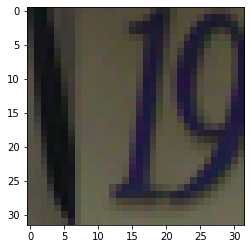

In [3]:
plt.imshow(train_X[0])

In [4]:
train_X.shape, train_y.shape

((1000, 32, 32, 3), (1000,))

In [20]:
IMAGE_WIDTH = 32;
IMAGE_HEIGHT = 32;
IMAGE_CHANNELS = 3;
options = {
  'task': 'imageClassification',
  'inputs':[IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS],
  'outputs': 10,
#     'layers':[
#   {
#     'type': 'conv2d',
#     'filters': 32,
#     'kernelSize': 3,
#     'strides': 1,
#     'activation': 'relu',
#     'kernelInitializer': 'varianceScaling',
#   },
#   {
#     'type': 'maxPooling2d',
#     'poolSize': [2, 2],
#     'strides': [1, 1],
#   },
#   {
#     'type': 'conv2d',
#     'filters': 32,
#     'kernelSize': 3,
#     'strides': 1,
#     'activation': 'relu',
#     'kernelInitializer': 'varianceScaling',
#   },
#   {
#     'type': 'maxPooling2d',
#     'poolSize': [2, 2],
#     'strides': [1, 1],
#   },
#   {
#     'type': 'flatten',
#   },
#   {
#     'type': 'dense',
#     'kernelInitializer': 'varianceScaling',
#     'activation': 'softmax',
#   },
# ]
}
test = ml5_init.ML5Class(options)
test.initialize_framework()

In [ ]:
# test.js_init("""
#     console.log(element.nn_info.network.data);
#     console.log(outputs);
#     console.log(inputs)
#     element.nn_info.network.addData(inputs, outputs);
# """,inputs = train_X[0].flatten().tolist(),outputs = [train_y[0]])

In [22]:
test.js_init("""
    console.log(element.nn_info.network.data);
    console.log(element.nn_info.network);
""")

In [21]:
for k in range(1000):
    i = train_X[k].flatten().tolist()
    o = train_y[k]
    test.add_data([i], [o])

In [23]:
trainingOptions = {
  'epochs': 32,
  'batchSize': 16
}
test.train_data(trainingOptions)

...................done


In [36]:
test.js_init("""
            function handleResults(error, result) {
                if(error){
                    console.error(error);
                    return;
                }
                console.log(result);
            }
            debugger;
            element.nn_info.network.classify([inputs], handleResults);

        """, inputs=test_X[0].tolist())

In [40]:
test_X[0].shape

(32, 32, 3)

In [25]:
# for i in range(200):
#     test_data = test_X[i].flatten().tolist()
#     test.classify_data([test_data])

In [32]:
test.classify_callback_list

[]